# Preprocessing , EDA, Feature engineering and selection

In [2]:
import pandas as pd

In [2]:
dataset=pd.read_csv('SCMS_Delivery_History_Dataset.csv')

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
#dataset.head(200)

Replacing few missing values with there references given.

In [ ]:
def fill_references(df):
    for i,j in enumerate(df['Weight (Kilograms)']):
        if str(j)[0]=='S':
            ls=str(j).split(' ')
            ref_id=ls[2][5:-1]
            ref_asn=ls[1]
            df['Weight (Kilograms)'][i]=list(df[(df['ID']==int(ref_id)) & (df['ASN/DN #']==str(ref_asn))]['Weight (Kilograms)'])[0]
    for i,j in enumerate(df['Freight Cost (USD)']):
        if str(j)[0]=='S':
            ls=str(j).split(' ')
            ref_id=ls[2][5:-1]
            ref_asn=ls[1]
            df['Freight Cost (USD)'][i]=list(df[(df['ID']==int(ref_id)) & (df['ASN/DN #']==str(ref_asn))]['Freight Cost (USD)'])[0]
    return df

In [ ]:
dataset=fill_references(dataset)

Dividing dataset into train and test for pre-processing separately to avoid data leakage.

In [ ]:
train_data=dataset.sample(frac=0.70)
test_data=dataset.drop(train_data.index)

In [ ]:
train_data.to_csv('train_data.csv')
test_data.to_csv('test_data.csv')

# Train Data RDC

In [5]:
data=pd.read_csv('train_data.csv')

In [5]:
data.head(200)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,12315,110-ZM-T01,Pre-PQ Process,SO-29090,DN-1406,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,Date Not Captured,N/A - From RDC,22-Sep-09,22-Sep-09,22-Sep-09,ARV,Adult,SCMS from RDC,Lamivudine/Tenofovir Disoproxil Fumarate 300/3...,Lamivudine/Tenofovir Disoproxil Fumarate,Generic,300/300mg,Tablet - FDC,30,92095,1059092.50,11.50,0.38,Mylan (formerly Matrix) Nashik,Yes,7686,6759.28,2075.82
1,82883,151-NG-T30,FPQ-4537,SO-36005,DN-1823,Nigeria,PMO - US,From RDC,N/A - From RDC,Air Charter,11-06-2009,N/A - From RDC,31-May-10,18-May-10,18-May-10,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,1227,10748.52,8.76,0.15,Hetero Unit III Hyderabad IN,Yes,107,9736.1,23.17
2,10825,113-ZW-T01,Pre-PQ Process,SO-279,DN-187,Zimbabwe,PMO - US,From RDC,N/A - From RDC,NaN,Pre-PQ Process,N/A - From RDC,12-Jun-07,12-Jun-07,12-Jun-07,ARV,Adult,SCMS from RDC,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,2329,7615.83,3.27,0.05,"Ranbaxy, Paonta Shahib, India",Yes,153,1013.24,12.19
3,84279,101-CD-T30,FPQ-12088,SO-45030,DN-3269,"Congo, DRC",PMO - US,From RDC,N/A - From RDC,Air,04-12-2013,N/A - From RDC,28-Aug-13,08-Feb-14,11-Mar-14,ARV,Adult,SCMS from RDC,Lamivudine/Nevirapine/Zidovudine 150/200/300mg...,Lamivudine/Nevirapine/Zidovudine,Generic,150/300/200mg,Tablet - FDC,60,800,6608.00,8.26,0.14,Mylan (formerly Matrix) Nashik,No,758,20499.33,8.17
4,85929,151-NG-T30,FPQ-10477,SO-43044,DN-2996,Nigeria,PMO - US,From RDC,N/A - From RDC,Air Charter,08-09-2012,N/A - From RDC,11-Feb-13,11-Feb-13,11-Feb-13,ARV,Adult,SCMS from RDC,"Nevirapine 200mg, tablets, 60 Tabs",Nevirapine,Generic,200mg,Tablet,60,107500,248325.00,2.31,0.04,"Strides, Bangalore, India.",No,12032,29780.5,348.15
5,11010,104-CI-T01,Pre-PQ Process,SO-21880,DN-1152,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Air,Pre-PQ Process,N/A - From RDC,30-Apr-09,30-Apr-09,30-Apr-09,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,23524,206070.24,8.76,0.15,"Aurobindo Unit III, India",Yes,3155,9021.82,403.90
6,85868,102-CD-T30,FPQ-9640,SO-41850,DN-2697,"Congo, DRC",PMO - US,From RDC,N/A - From RDC,Air,04-02-2012,N/A - From RDC,11-Sep-12,11-Sep-12,11-Sep-12,ARV,Adult,SCMS from RDC,"Zidovudine 300mg, tablets, 60 Tabs",Zidovudine,Generic,300mg,Tablet,60,1300,8853.00,6.81,0.11,Hetero Unit III Hyderabad IN,No,895,6061.4,12.41
7,30589,116-ZA-T30,FPQ-14942,SCMS-259078,ASN-33470,South Africa,PMO - US,Direct Drop,DDP,Truck,09-11-2014,10-09-2014,24-Jul-15,24-Jul-15,24-Jul-15,ARV,Pediatric,PHARMACY DIRECT,"Efavirenz 200mg, capsule, 90 Caps",Efavirenz,Generic,200mg,Capsule,90,10,182.50,18.25,0.20,"Aurobindo Unit III, India",No,Weight Captured Separately,Freight Included in Commodity Cost,0.19
8,82325,110-ZM-T30,FPQ-4273,SO-33701,DN-1866,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,9/17/09,N/A - From RDC,30-Jun-10,29-Jun-10,29-Jun-10,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,22560,197625.60,8.76,0.15,Hetero Unit III Hyderabad IN,Yes,1928,11054.56,387.35
9,16097,109-TZ-T30,FPQ-3782,SCMS-47770,ASN-5364,Tanzania,PMO - US,Direct Drop,CIP,Air,06-11-2009,6/29/09,27-Nov-09,27-Nov-09,27-Nov-09,ARV,Adult,BRISTOL-MYERS SQUIBB,"Didanosine EC 250mg [Videx EC], delayed-releas...",Didanosine EC,Videx EC,250mg,Delayed-release capsules - blister,30,1

The products are either delivered via Regional distribution centres(RDC) or via Direct Drop from manufacturing site to destination.
Let us split data according to delivery process, since both are different aspects in logistics.
To understand more about data, visit https://www.opendatanetwork.com/dataset/data.usaid.gov/a3rc-nmf6

In [6]:
train_data_RDC=data[data['Fulfill Via']=='From RDC']
train_data_DD=data[data['Fulfill Via']=='Direct Drop']

In [7]:
Selected_features=['Country','Shipment Mode', 'Scheduled Delivery Date',
                  'Delivered to Client Date','Product Group','Sub Classification', 'Dosage Form',
                  'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value',
                  'Pack Price', 'Unit Price', 'Manufacturing Site',
                  'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)','Line Item Insurance (USD)']

These features are selected by eliminating unnecessary features like primary keys, features having one unique value in more than 90% of data and few features discribing type of product because all that matters for logistics is product size and weight.
These features will not be same for fullfill via-direct droping train data.

In [8]:
new_train_data_RDC=train_data_RDC.filter(Selected_features,axis=1)

Replacing missing values with Nan and droping them.

In [9]:
new_train_data_RDC['Weight (Kilograms)']=new_train_data_RDC['Weight (Kilograms)'].replace(['Weight Captured Separately'],None)
new_train_data_RDC['Freight Cost (USD)']=new_train_data_RDC['Freight Cost (USD)'].replace(['Invoiced Separately','Freight Included in Commodity Cost'],None)

In [10]:
new_train_data_RDC.dropna(inplace=True)

In [11]:
new_train_data_RDC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3254 entries, 0 to 7224
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     3254 non-null   object 
 1   Shipment Mode               3254 non-null   object 
 2   Scheduled Delivery Date     3254 non-null   object 
 3   Delivered to Client Date    3254 non-null   object 
 4   Product Group               3254 non-null   object 
 5   Sub Classification          3254 non-null   object 
 6   Dosage Form                 3254 non-null   object 
 7   Unit of Measure (Per Pack)  3254 non-null   int64  
 8   Line Item Quantity          3254 non-null   int64  
 9   Line Item Value             3254 non-null   float64
 10  Pack Price                  3254 non-null   float64
 11  Unit Price                  3254 non-null   float64
 12  Manufacturing Site          3254 non-null   object 
 13  First Line Designation      3254 

Decreasing levels in categorical variables for ease of analysis.

In [12]:
new_train_data_RDC['Dosage Form'].value_counts() #Till Oral suspension it is covering 95% of RDC_train data

Tablet - FDC                         1332
Tablet                               1193
Oral solution                         201
Capsule                               191
Chewable/dispersible tablet - FDC     116
Oral suspension                       100
Test kit                               66
Chewable/dispersible tablet            27
Test kit - Ancillary                   12
Delayed-release capsules               11
Powder for oral solution                3
Tablet - FDC + co-blister               2
Name: Dosage Form, dtype: int64

In [13]:
ls=['Powder for oral solution','Delayed-release capsules - blister', 'Tablet - FDC + blister',
     'Tablet - FDC + co-blister', 'Injection','Delayed-release capsules',
     'Chewable/dispersible tablet - FDC','Tablet - blister',
    'Oral powder','Test kit','Chewable/dispersible tablet','Test kit - Ancillary']
new_train_data_RDC['Dosage Form']=new_train_data_RDC['Dosage Form'].replace(ls,'Other_dosage_form')

In [14]:
new_train_data_RDC['Dosage Form'].value_counts()

Tablet - FDC         1332
Tablet               1193
Other_dosage_form     237
Oral solution         201
Capsule               191
Oral suspension       100
Name: Dosage Form, dtype: int64

In [15]:
new_train_data_RDC.Country.value_counts() #Till Ethiopia it is covering 95% of the of RDC_train data.

Nigeria               546
Côte d'Ivoire         477
Uganda                365
Mozambique            321
Zambia                279
Zimbabwe              279
Haiti                 221
Tanzania              178
Congo, DRC            129
Rwanda                107
Guyana                 91
Ethiopia               77
Burundi                46
South Sudan            29
Dominican Republic     21
Kenya                  14
Namibia                14
Cameroon               12
Swaziland               9
Ghana                   9
Benin                   7
Libya                   6
Pakistan                5
Guatemala               5
Botswana                3
Angola                  3
Togo                    1
Name: Country, dtype: int64

In [16]:
ls2=['Benin','Burundi', 'Namibia','Cameroon','Dominican Republic', 
     'South Sudan', 'Libya', 'Swaziland', 'Kenya','Togo', 'Pakistan', 
     'Ghana', 'Guatemala', 'Botswana', 'Angola']
new_train_data_RDC['Country']=new_train_data_RDC['Country'].replace(ls2,'Other_country')

In [17]:
new_train_data_RDC.Country.value_counts() 

Nigeria          546
Côte d'Ivoire    477
Uganda           365
Mozambique       321
Zambia           279
Zimbabwe         279
Haiti            221
Other_country    184
Tanzania         178
Congo, DRC       129
Rwanda           107
Guyana            91
Ethiopia          77
Name: Country, dtype: int64

In [18]:
new_train_data_RDC['Weight (Kilograms)']=new_train_data_RDC['Weight (Kilograms)'].astype(float)
new_train_data_RDC['Freight Cost (USD)']=new_train_data_RDC['Freight Cost (USD)'].astype(float)

# EDA

<AxesSubplot:>

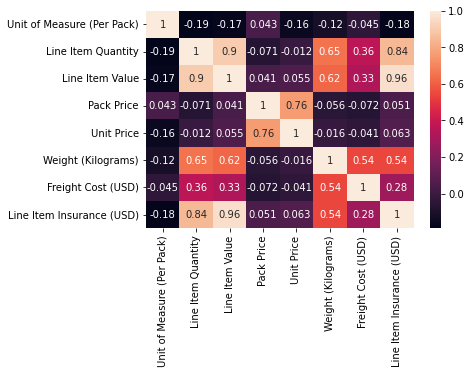

In [19]:
import seaborn as sns
sns.heatmap(new_train_data_RDC.corr(),annot=True)

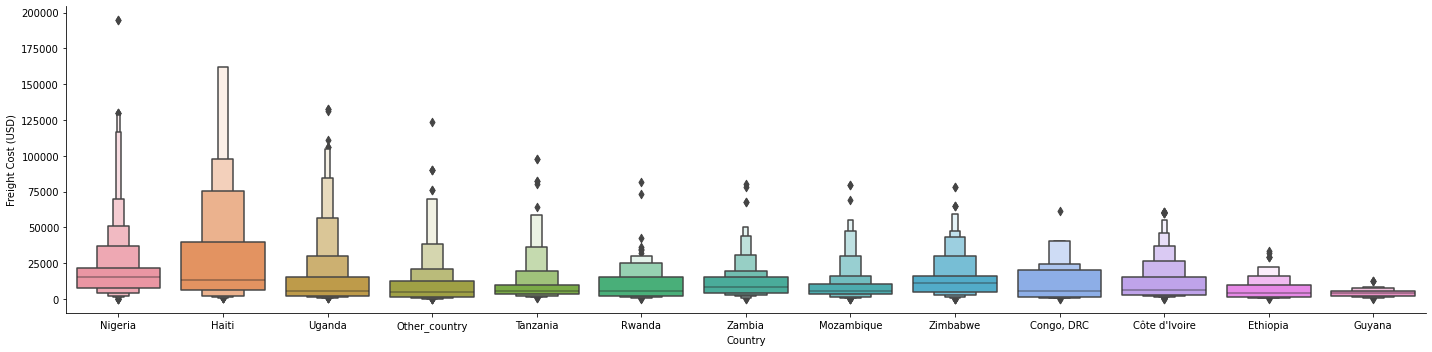

In [20]:
sns.catplot(y = "Freight Cost (USD)", x = "Country", data = new_train_data_RDC.sort_values("Freight Cost (USD)", 
            ascending = False), kind="boxen", height = 5, aspect = 4)
#Almost to all the countries the median freight cost is similar

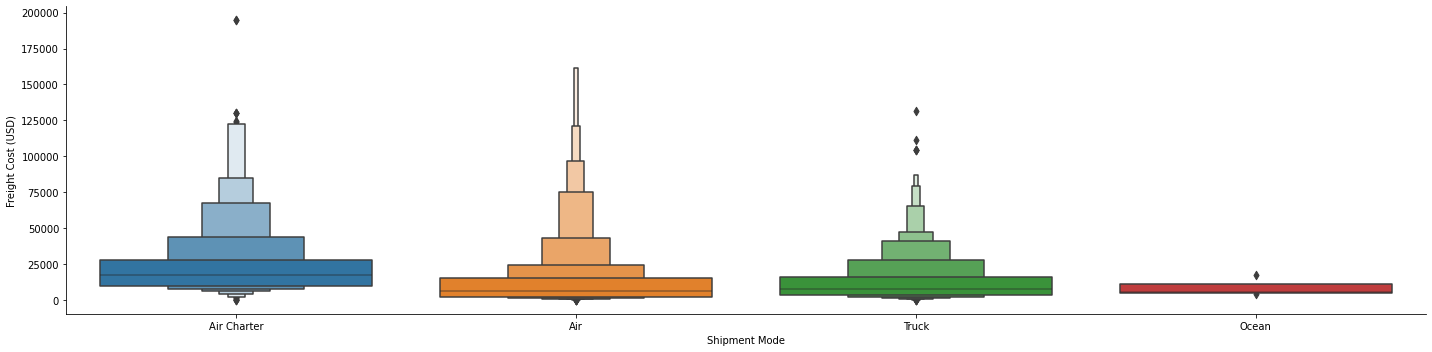

In [21]:
sns.catplot(y = "Freight Cost (USD)", x = "Shipment Mode", 
            data = new_train_data_RDC.sort_values("Freight Cost (USD)", ascending = False), 
            kind="boxen", height = 5, aspect = 4)
#Air charter service price is a bit higher that other modes

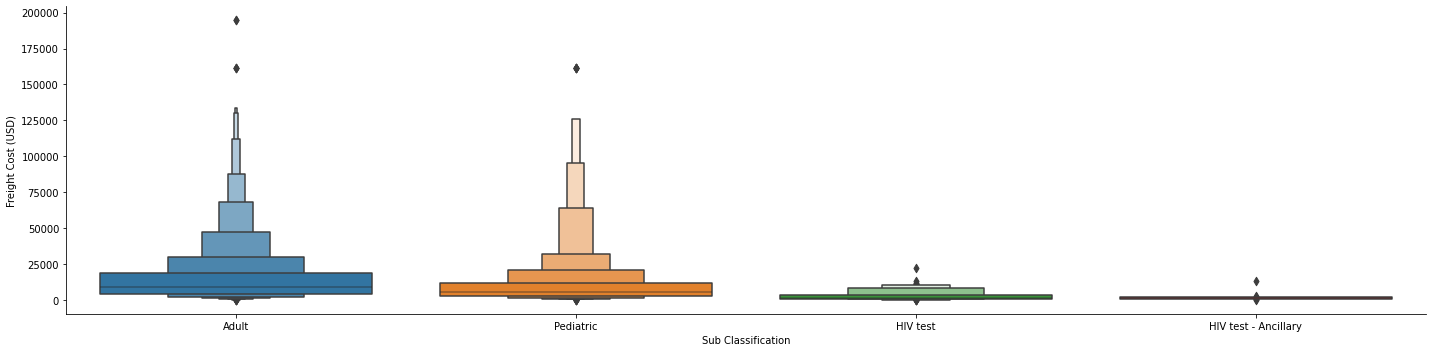

In [22]:
sns.catplot(y = "Freight Cost (USD)", x = "Sub Classification", 
            data = new_train_data_RDC.sort_values("Freight Cost (USD)", ascending = False), 
            kind="boxen", height = 5, aspect = 4)

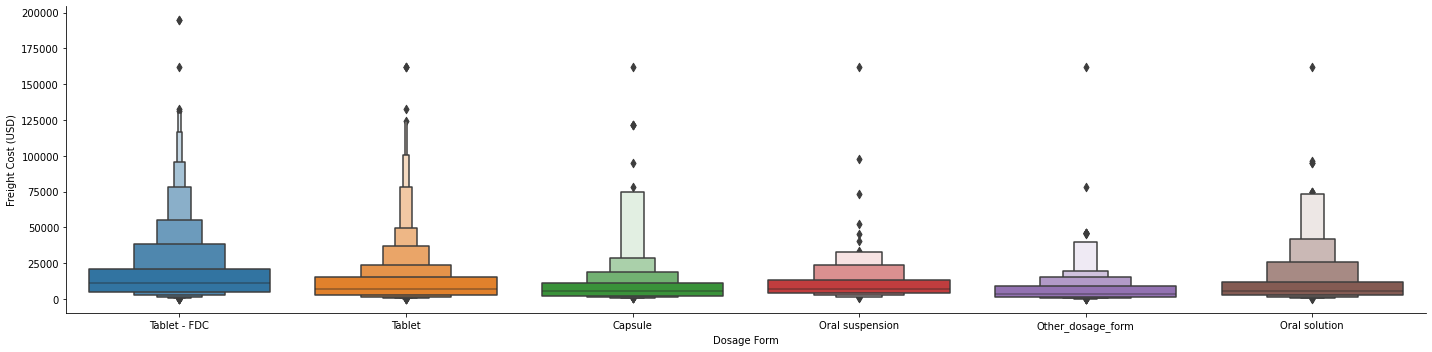

In [23]:
sns.catplot(y = "Freight Cost (USD)", x = "Dosage Form", 
            data = new_train_data_RDC.sort_values("Freight Cost (USD)", ascending = False), 
            kind="boxen", height = 5, aspect = 4)

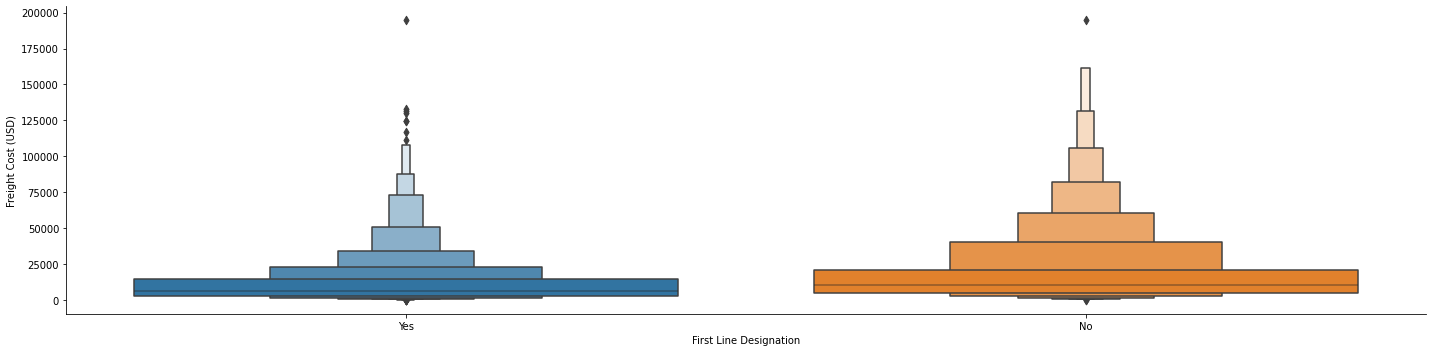

In [24]:
sns.catplot(y = "Freight Cost (USD)", x = "First Line Designation", data = new_train_data_RDC.sort_values("Freight Cost (USD)", ascending = False), kind="boxen", height = 5, aspect = 4)

Our Independent variables Frieght Cost and Line Item Insurance are not normally distibuted, hence we use not parametric tests to understand the relation between dependent and independent(categorical) features.
The non-parametric test that is alternative to anova are Kruskal-Wallis H Test for unpaired groups and Friedman Test for paired groups. Refer https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/ for more info.

In [1]:
from scipy import stats

In [25]:
import numpy as np
def get_values(d_f,Country):
    return np.array(d_f[d_f['Country']==Country]['Freight Cost (USD)'])
Zambia=get_values(new_train_data_RDC,'Zambia')
Nigeria=get_values(new_train_data_RDC,'Nigeria')
Congo=get_values(new_train_data_RDC,r'Congo, DRC')
CôtedIvoire=get_values(new_train_data_RDC,r"Côte d'Ivoire")
Rwanda=get_values(new_train_data_RDC,'Rwanda')
Haiti =get_values(new_train_data_RDC,'Haiti')
Tanzania=get_values(new_train_data_RDC,'Tanzania')
Zimbabwe=get_values(new_train_data_RDC,'Zimbabwe')
Uganda=get_values(new_train_data_RDC,'Uganda')
Other_country=get_values(new_train_data_RDC,'Other_country')
Ethiopia=get_values(new_train_data_RDC,'Ethiopia')
Mozambique=get_values(new_train_data_RDC,'Mozambique')
Guyana=get_values(new_train_data_RDC,'Guyana')

In [26]:
stats.kruskal(Zambia,Nigeria,Congo,CôtedIvoire,Rwanda,Haiti,Tanzania,
              Zimbabwe,Uganda,Other_country,Ethiopia,Mozambique,Guyana)

KruskalResult(statistic=338.8429578617733, pvalue=3.160663577871782e-65)

The p-value which is less than 0.05 we reject null hypothesis stating, population median of the groups are equal and accept alternate hypothesis stating that, there exist a significant difference between group's median.

In [27]:
def get_values(d_f,S_mode):
    return np.array(d_f[d_f['Shipment Mode']==S_mode]['Freight Cost (USD)'])
Truck=get_values(new_train_data_RDC,'Truck')
Air=get_values(new_train_data_RDC,'Air')
Air_charter=get_values(new_train_data_RDC,r'Air Charter')
Ocean=get_values(new_train_data_RDC,'Ocean')

In [28]:
stats.kruskal(Truck,Air,Air_charter,Ocean)

KruskalResult(statistic=267.9973035812158, pvalue=8.37031424005783e-58)

The p-value which is less than 0.05 we reject null hypothesis stating, population median of the groups are equal and accept alternate hypothesis stating that, there exist a significant difference between group's median.

In [29]:
def get_values(d_f,S_mode):
    return np.array(d_f[d_f['Sub Classification']==S_mode]['Freight Cost (USD)'])
Adult=get_values(new_train_data_RDC,'Adult')
Pediatric=get_values(new_train_data_RDC,'Pediatric')
HIV_test=get_values(new_train_data_RDC,r'HIV test')
HIV_test_ancillary=get_values(new_train_data_RDC,r'HIV test - Ancillary')

In [30]:
stats.kruskal(Adult,Pediatric,HIV_test,HIV_test_ancillary)

KruskalResult(statistic=150.37628444897422, pvalue=2.185718582591913e-32)

The p-value which is less than 0.05 we reject null hypothesis stating, population median of the groups are equal and accept alternate hypothesis stating that, there exist a significant difference between group's median.

In [31]:
new_train_data_RDC['Dosage Form'].unique()

array(['Tablet - FDC', 'Tablet', 'Oral solution', 'Other_dosage_form',
       'Capsule', 'Oral suspension'], dtype=object)

In [32]:
def get_values(d_f,Dosage_Form):
    return np.array(d_f[d_f['Dosage Form']==Dosage_Form]['Freight Cost (USD)'])
Tablet_FDC=get_values(new_train_data_RDC,r'Tablet - FDC')
Tablet=get_values(new_train_data_RDC,'Tablet')
Oral_solution=get_values(new_train_data_RDC,r'Oral solution')
Other_dosage_form=get_values(new_train_data_RDC,'Other_dosage_form')
Capsule=get_values(new_train_data_RDC,'Capsule')
Oral_suspension=get_values(new_train_data_RDC,r'Oral suspension')


In [33]:
stats.kruskal(Tablet_FDC,Tablet,Oral_solution,Other_dosage_form,Capsule,Oral_suspension)

KruskalResult(statistic=197.6562134554216, pvalue=9.010687572452963e-41)

The p-value which is less than 0.05 we reject null hypothesis stating, population median of the groups are equal and accept alternate hypothesis stating that, there exist a significant difference between group's median.

In [34]:
new_train_data_RDC['First Line Designation'].unique()

array(['Yes', 'No'], dtype=object)

In [35]:
def get_values(d_f,Line_item_designation):
    return np.array(d_f[d_f['First Line Designation']==Line_item_designation]['Freight Cost (USD)'])
Yes=get_values(new_train_data_RDC,'Yes')
No=get_values(new_train_data_RDC,'No')


In [36]:
stats.kruskal(Yes,No)

KruskalResult(statistic=151.7246490914622, pvalue=7.277904777506533e-35)

In [37]:
#After EDA these features are partially selected for taking input from user

feat2=['Country','Shipment Mode','Sub Classification','Dosage Form','First Line Designation','Line Item Quantity',
     'Line Item Value','Weight (Kilograms)'] #Independent Features
feat3=['Line Item Insurance (USD)','Freight Cost (USD)'] #Dependent features

In [38]:
X_train_data_RDC=new_train_data_RDC.filter(feat2,axis=1)
Y_train_data_RDC=new_train_data_RDC.filter(feat3,axis=1)

In [39]:
Y_train_data_RDC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3254 entries, 0 to 7224
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Line Item Insurance (USD)  3254 non-null   float64
 1   Freight Cost (USD)         3254 non-null   float64
dtypes: float64(2)
memory usage: 76.3 KB


# Test data RDC

In [40]:
data_2=pd.read_csv('test_data.csv')

In [41]:
test_data_RDC=data_2[data_2['Fulfill Via']=='From RDC']
test_data_DD=data_2[data_2['Fulfill Via']=='Direct Drop']

In [42]:
Selected_features=['Country','Shipment Mode', 'Scheduled Delivery Date',
                  'Delivered to Client Date','Product Group','Sub Classification', 'Dosage Form',
                  'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value',
                  'Pack Price', 'Unit Price', 'Manufacturing Site',
                  'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)','Line Item Insurance (USD)']

In [43]:
new_test_data_RDC=test_data_RDC.filter(Selected_features,axis=1)
new_test_data_RDC=new_test_data_RDC.dropna()

In [44]:
new_test_data_RDC['Weight (Kilograms)']=new_test_data_RDC['Weight (Kilograms)'].replace(['Weight Captured Separately'],None)
new_test_data_RDC['Freight Cost (USD)']=new_test_data_RDC['Freight Cost (USD)'].replace(['Invoiced Separately','Freight Included in Commodity Cost'],None)

In [45]:
new_test_data_RDC.dropna(inplace=True)
ls=['Powder for oral solution','Delayed-release capsules - blister', 'Tablet - FDC + blister',
     'Tablet - FDC + co-blister', 'Injection','Delayed-release capsules',
     'Chewable/dispersible tablet - FDC','Tablet - blister',
    'Oral powder','Test kit','Chewable/dispersible tablet','Test kit - Ancillary']
new_test_data_RDC['Dosage Form']=new_test_data_RDC['Dosage Form'].replace(ls,'Other_dosage_form')

In [46]:
ls2=['Benin','Burundi', 'Namibia','Cameroon','Dominican Republic', 
     'South Sudan', 'Libya', 'Swaziland', 'Kenya','Togo', 'Pakistan', 
     'Ghana', 'Guatemala', 'Botswana', 'Angola','Sierra Leone','Senegal','Vietnam']
new_test_data_RDC['Country']=new_test_data_RDC['Country'].replace(ls2,'Other_country')

In [47]:
new_test_data_RDC['Weight (Kilograms)']=new_test_data_RDC['Weight (Kilograms)'].astype(float)
new_test_data_RDC['Freight Cost (USD)']=new_test_data_RDC['Freight Cost (USD)'].astype(float)

In [48]:
new_test_data_RDC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 286 to 3094
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     1457 non-null   object 
 1   Shipment Mode               1457 non-null   object 
 2   Scheduled Delivery Date     1457 non-null   object 
 3   Delivered to Client Date    1457 non-null   object 
 4   Product Group               1457 non-null   object 
 5   Sub Classification          1457 non-null   object 
 6   Dosage Form                 1457 non-null   object 
 7   Unit of Measure (Per Pack)  1457 non-null   int64  
 8   Line Item Quantity          1457 non-null   int64  
 9   Line Item Value             1457 non-null   float64
 10  Pack Price                  1457 non-null   float64
 11  Unit Price                  1457 non-null   float64
 12  Manufacturing Site          1457 non-null   object 
 13  First Line Designation      145

In [49]:
feat2=['Country','Shipment Mode','Sub Classification','Dosage Form','First Line Designation','Line Item Quantity',
     'Line Item Value','Weight (Kilograms)'] #Independent Features
feat3=['Line Item Insurance (USD)','Freight Cost (USD)'] #Dependent features

In [50]:
X_test_data_RDC=new_test_data_RDC.filter(feat2,axis=1)
Y_test_data_RDC=new_test_data_RDC.filter(feat3,axis=1)

In [51]:
import numpy as np
X_train_RDC=pd.get_dummies(X_train_data_RDC)
X_test_RDC=pd.get_dummies(X_test_data_RDC)
Y_train_data_RDC_FC=np.array(Y_train_data_RDC.drop('Line Item Insurance (USD)',axis=1)).reshape(-1,1)

Now let us find important features that are effecting the Freight Cost using decision trees.
For more information visit https://medium.com/analytics-vidhya/feature-importance-explained-bfc8d874bcf#:~:text=Decision%20tree%20uses%20CART%20technique%20to%20find%20out,from%20sklearn.datasets%20import%20make_regression%20from%20sklearn.tree%20import%20DecisionTreeRegressor

# Feature Selection for predicting freight cost using tree regressor.

In [52]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_train_RDC,Y_train_data_RDC_FC)

C:\Users\HP\AppData\Local\Temp\ipykernel_6436\1503235138.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(X_train_RDC,Y_train_data_RDC_FC)


ExtraTreesRegressor()

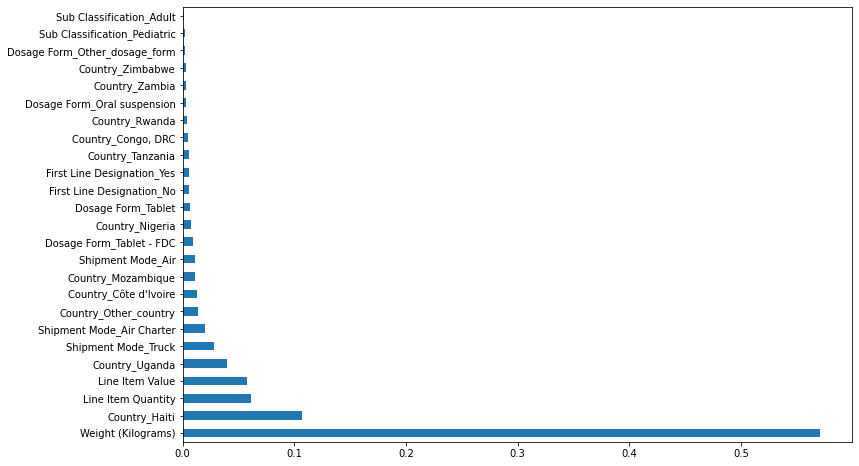

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X_train_RDC.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

Country, Shipment Mode, Doasge Form, Line Item Quantity, Line Item Value and Weight are considered to be as important features for predicting Freight Cost

In [54]:
feat0=['Country','Shipment Mode','Dosage Form','Line Item Quantity',
     'Line Item Value','Weight (Kilograms)']
feat1=['Freight Cost (USD)']

In [55]:
X_new_train_RDC=new_train_data_RDC.filter(feat0,axis=1)
Y_new_train_RDC=new_train_data_RDC.filter(feat1,axis=1)
X_new_test_RDC=new_test_data_RDC.filter(feat0,axis=1)
Y_new_test_RDC=new_test_data_RDC.filter(feat1,axis=1)

In [56]:
X_new_train_RDC_dummies=pd.get_dummies(X_new_train_RDC)
X_new_test_RDC_dummies=pd.get_dummies(X_new_test_RDC)


In [57]:
X_new_test_RDC_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 286 to 3094
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Line Item Quantity             1457 non-null   int64  
 1   Line Item Value                1457 non-null   float64
 2   Weight (Kilograms)             1457 non-null   float64
 3   Country_Congo, DRC             1457 non-null   uint8  
 4   Country_Côte d'Ivoire          1457 non-null   uint8  
 5   Country_Ethiopia               1457 non-null   uint8  
 6   Country_Guyana                 1457 non-null   uint8  
 7   Country_Haiti                  1457 non-null   uint8  
 8   Country_Mozambique             1457 non-null   uint8  
 9   Country_Nigeria                1457 non-null   uint8  
 10  Country_Other_country          1457 non-null   uint8  
 11  Country_Rwanda                 1457 non-null   uint8  
 12  Country_Tanzania               1457 non-null  

# Model Building

# # Using RandomForest model.

In [58]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_new_train_RDC_dummies, Y_new_train_RDC)

C:\Users\HP\AppData\Local\Temp\ipykernel_6436\4120713290.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_rf.fit(X_new_train_RDC_dummies, Y_new_train_RDC)


RandomForestRegressor()

In [60]:
Y_pred_RDC=reg_rf.predict(X_new_test_RDC_dummies)

In [61]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [62]:
r2_score(Y_new_test_RDC,Y_pred_RDC)

0.8268530935262776

In [63]:
mean_squared_error(Y_new_test_RDC,Y_pred_RDC)

63164860.04100042

In [64]:
mean_absolute_error(Y_new_test_RDC,Y_pred_RDC)

4241.773787218029

The R2 score we got is pretty much good. Hence, we can use this model for prediction.

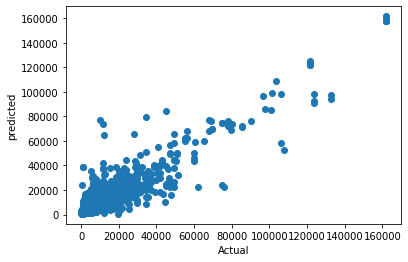

In [63]:
plt.scatter(actual_predict_df['Actual'],actual_predict_df['Predicted'])
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

Let's do hyperparameter tuning with the help of grid search cross validation method from sklearn library.
Visit https://scikit-learn.org/stable/modules/grid_search.html#grid-search for more info.

# Hyperparameter Tuning

In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [60]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [61]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [62]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 5, 
                               verbose=2, random_state=42, n_jobs = 1)


In [63]:
rf_random.fit(X_new_train_RDC_dummies, Y_new_train_RDC)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.7s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.8s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.7s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.9s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.8s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.5s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.5s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.6s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.5s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.5s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   2.7s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   2.7s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   2.7s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   2.7s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   2.9s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   4.5s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   4.2s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   4.2s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   4.3s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   4.2s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.0s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.0s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.0s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.0s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.0s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.7s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.8s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.8s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.7s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.7s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.7s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.7s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.7s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.7s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.7s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.1s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.1s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.1s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.1s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.1s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   5.4s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   5.3s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   5.3s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   5.4s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   5.2s


C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\HP\.conda\envs\MBA_DA\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [70]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [71]:
Y_pred_RDC=rf_random.predict(X_new_test_RDC_dummies)

In [72]:
r2_score(Y_new_test_RDC,Y_pred_RDC)

0.7918956121081273

In [94]:
import pickle as pkl

In [95]:
with open("rf_model.pickle", 'wb') as f:
    pkl.dump(rf_random, f)